# All Weather Portfolio Analysis: A Ray Dalio-Inspired Approach

This notebook provides a comprehensive, explainable analysis of stocks, bonds, crypto, and ETFs, inspired by Ray Dalio's All Weather Portfolio philosophy. It covers asset class behavior, risk/return, correlations, macro context, and provides actionable recommendations for robust portfolio management.

---

**Outline:**
1. Introduction: All Weather Portfolio Principles
2. Data Import: Stocks, Bonds, Crypto, Commodities, ETFs
3. Asset Class Overview & Macro Context
4. Risk/Return Analysis (Annualized)
5. Correlation Matrix & Diversification
6. Drawdown & Volatility Analysis
7. Portfolio Construction & Backtest
8. Stress Test: Inflation, Deflation, Crisis
9. Crypto as a New Asset Class
10. Recommendations for Portfolio Management


In [7]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Set matplotlib dark mode for all plots
def set_dark_mode():
    plt.style.use('dark_background')
    plt.rcParams['axes.facecolor'] = '#181818'
    plt.rcParams['figure.facecolor'] = '#181818'
    plt.rcParams['axes.edgecolor'] = '#444444'
    plt.rcParams['axes.labelcolor'] = '#cccccc'
    plt.rcParams['xtick.color'] = '#cccccc'
    plt.rcParams['ytick.color'] = '#cccccc'
    plt.rcParams['text.color'] = '#cccccc'
    plt.rcParams['legend.facecolor'] = '#222222'
    plt.rcParams['legend.edgecolor'] = '#444444'
    plt.rcParams['grid.color'] = '#333333'
    plt.rcParams['axes.grid'] = True
set_dark_mode()

# Set risk-free rate (annualized, as decimal)
risk_free_rate = 0.045  # Approximate US 10-year Treasury yield as of mid-2025


In [8]:
# 2. Data Import: Define Tickers and Download Data
asset_tickers = {
    # Stocks
    'S&P 500': 'SPY',
    'Nasdaq 100': 'QQQ',
    'World ex-US': 'VEU',
    # Bonds
    'Long Bonds': 'TLT',
    'Intermediate Bonds': 'IEF',
    'Short Bonds': 'SHY',
    'Treasury Inflation-Protected': 'TIP',
    # Commodities
    'Gold': 'GLD',
    'Commodities': 'DBC',
    # Crypto
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    # Real Estate
    'REITs': 'VNQ',
}

start_date = '2007-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

def download_assets(tickers, start, end):
    data = {}
    for name, symbol in tickers.items():
        df = yf.download(symbol, start=start, end=end, progress=False)[['Close']]
        df = df.rename(columns={'Close': name})
        data[name] = df
    return pd.concat(data.values(), axis=1)

prices = download_assets(asset_tickers, start_date, end_date)
prices = prices.ffill().dropna(how='all')
prices.tail()

C:\Users\saris\AppData\Local\Temp\ipykernel_39140\2578426022.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end, progress=False)[['Close']]
C:\Users\saris\AppData\Local\Temp\ipykernel_39140\2578426022.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end, progress=False)[['Close']]
C:\Users\saris\AppData\Local\Temp\ipykernel_39140\2578426022.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end, progress=False)[['Close']]
C:\Users\saris\AppData\Local\Temp\ipykernel_39140\2578426022.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end, progress=False)[['Close']]
C:\Users\saris\AppData\Local\Temp\ipykernel_39140\2578426022.py:28: FutureWarning: YF.download() has changed arg

Price,S&P 500,Nasdaq 100,World ex-US,Long Bonds,Intermediate Bonds,Short Bonds,Treasury Inflation-Protected,Gold,Commodities,Bitcoin,Ethereum,REITs
Ticker,SPY,QQQ,VEU,TLT,IEF,SHY,TIP,GLD,DBC,BTC-USD,ETH-USD,VNQ
Date,,,,,,,,,,,,
2025-07-01,617.650024,546.989990,67.230003,88.139999,95.290001,82.510002,109.599998,307.549988,21.930000,105698.281250,2405.792725,89.709999
2025-07-02,620.450012,550.799988,67.449997,87.580002,95.089996,82.500000,109.550003,309.250000,22.290001,108859.320312,2571.335449,89.919998
2025-07-03,625.340027,556.219971,67.570000,86.970001,94.760002,82.410004,109.360001,307.140015,22.280001,109647.976562,2591.007324,90.019997
2025-07-04,625.340027,556.219971,67.570000,86.970001,94.760002,82.410004,109.360001,307.140015,22.280001,108034.335938,2508.518311,90.019997
2025-07-05,625.340027,556.219971,67.570000,86.970001,94.760002,82.410004,109.360001,307.140015,22.280001,108231.179688,2517.280029,90.019997


## 1. Introduction: All Weather Portfolio Principles

Ray Dalio's All Weather Portfolio is designed to perform well in any economic environment by diversifying across asset classes that respond differently to inflation, deflation, growth, and recession. The core principles are:
- **Diversification**: Spread risk across uncorrelated assets (stocks, bonds, commodities, etc.)
- **Balance**: Allocate to assets that do well in different macro regimes
- **Risk Parity**: Balance risk, not just capital, across assets
- **Resilience**: Prepare for the unknown by not betting on any single outcome

This notebook applies these principles to a modern portfolio, including crypto as a new asset class, and provides actionable recommendations for robust, long-term investing.


C:\Users\saris\AppData\Local\Temp\ipykernel_39140\1627386806.py:4: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(prices.index, prices[col], label=col)


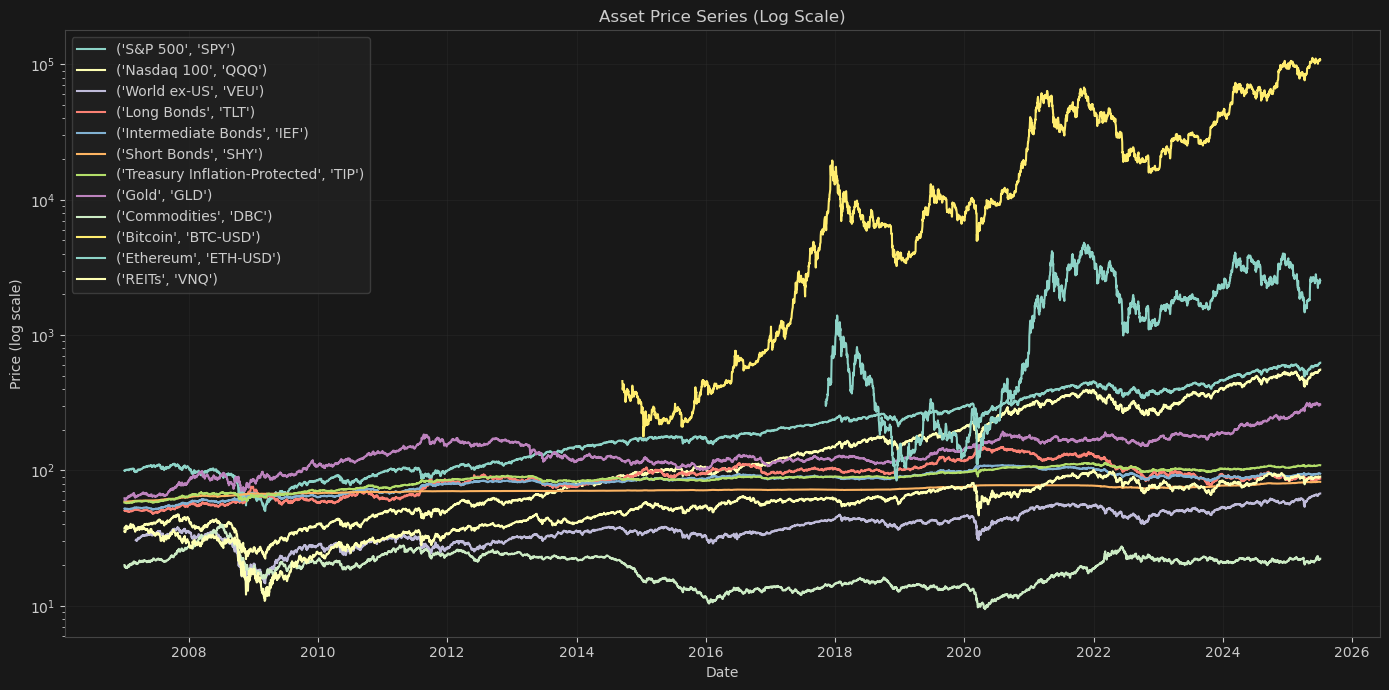

In [9]:
# 3. Asset Class Overview: Plot All Asset Prices (Log Scale)
plt.figure(figsize=(14,7))
for col in prices.columns:
    plt.plot(prices.index, prices[col], label=col)
plt.yscale('log')
plt.title('Asset Price Series (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Price (log scale)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [10]:
# 4. Risk/Return Analysis (Annualized)
returns = prices.pct_change().dropna()
annualized_return = returns.mean() * 252
annualized_vol = returns.std() * np.sqrt(252)
sharpe = (annualized_return - risk_free_rate) / annualized_vol
risk_table = pd.DataFrame({
    'Ann. Return': annualized_return,
    'Ann. Volatility': annualized_vol,
    'Sharpe Ratio': sharpe
}).sort_values('Ann. Return', ascending=False)
display(risk_table.style.format('{:.2%}'))

,,Ann. Return,Ann. Volatility,Sharpe Ratio
Price,Ticker,,,
Ethereum,ETH-USD,44.99%,72.25%,56.04%
Bitcoin,BTC-USD,40.78%,56.81%,63.86%
Nasdaq 100,QQQ,14.11%,20.20%,47.58%
S&P 500,SPY,10.44%,16.36%,36.31%
Gold,GLD,9.06%,12.17%,37.44%
World ex-US,VEU,5.28%,15.01%,5.19%
Commodities,DBC,5.12%,15.19%,4.10%
REITs,VNQ,5.04%,18.69%,2.90%
Treasury Inflation-Protected,TIP,1.89%,5.16%,-50.58%


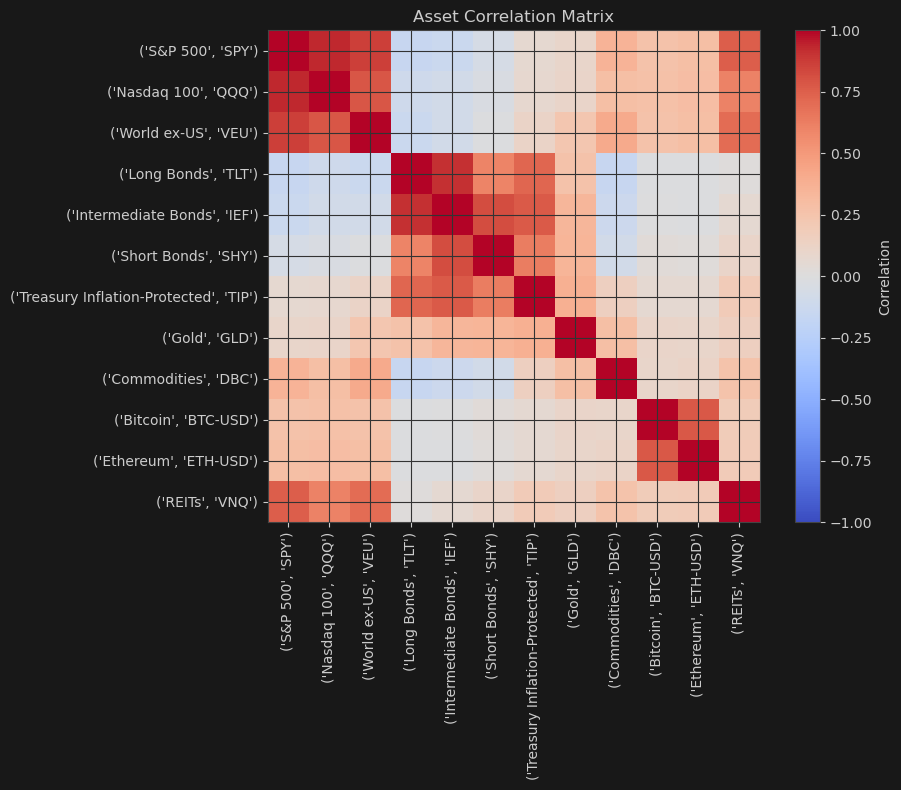

,Price,S&P 500,Nasdaq 100,World ex-US,Long Bonds,Intermediate Bonds,Short Bonds,Treasury Inflation-Protected,Gold,Commodities,Bitcoin,Ethereum,REITs
,Ticker,SPY,QQQ,VEU,TLT,IEF,SHY,TIP,GLD,DBC,BTC-USD,ETH-USD,VNQ
Price,Ticker,,,,,,,,,,,,
S&P 500,SPY,1.000000,0.936884,0.863227,-0.154626,-0.126455,-0.060536,0.066637,0.097180,0.356301,0.262633,0.282274,0.753091
Nasdaq 100,QQQ,0.936884,1.000000,0.784578,-0.103558,-0.083465,-0.036119,0.070786,0.106159,0.285353,0.272320,0.289286,0.609283
World ex-US,VEU,0.863227,0.784578,1.000000,-0.126437,-0.085596,-0.015100,0.113732,0.230183,0.410766,0.260725,0.285245,0.696249
Long Bonds,TLT,-0.154626,-0.103558,-0.126437,1.000000,0.911545,0.597546,0.723520,0.264702,-0.151218,-0.012826,-0.012578,0.011524
Intermediate Bonds,IEF,-0.126455,-0.083465,-0.085596,0.911545,1.000000,0.812893,0.765948,0.341408,-0.122571,-0.006859,-0.009368,0.061700
Short Bonds,SHY,-0.060536,-0.036119,-0.015100,0.597546,0.812893,1.000000,0.627545,0.346959,-0.078640,0.024772,0.016980,0.107405
Treasury Inflation-Protected,TIP,0.066637,0.070786,0.113732,0.723520,0.765948,0.627545,1.000000,0.378402,0.154226,0.059218,0.057176,0.193293
Gold,GLD,0.097180,0.106159,0.230183,0.264702,0.341408,0.346959,0.378402,1.000000,0.287411,0.103059,0.096470,0.150339


In [11]:
# 5. Correlation Matrix & Diversification
corr = returns.corr()
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.index)
plt.title('Asset Correlation Matrix')
plt.tight_layout()
plt.show()
display(corr)
